### Assumptions in Multilinear Regression

1. Linearity: The relationship between the predictors and the response is linear.

2. Independence: Observations are independent of each other.

3. Homoscedasticity: The residuals (differences between observed and predicted values) exhibit constant variance at all levels of the predictor.

4. Normal Distribution of Errors: The residuals of the model are normally distributed.

5. No multicollinearity: The independent variables should not be too highly correlated with each other.

### Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable predictions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
df=pd.read_csv("solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [3]:
# Summary statistics
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [5]:
# Check for missing values
print(df.isnull().sum())


distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


In [6]:
# Fill missing values in 'average-wind-speed-(period)' with the mean of the column
df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(), inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_12348\566099280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(), inplace=True)


In [7]:
# Check for missing values
print(df.isnull().sum())

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


We have to check whether the data is normal or not, for satisfying regression assumptions.

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

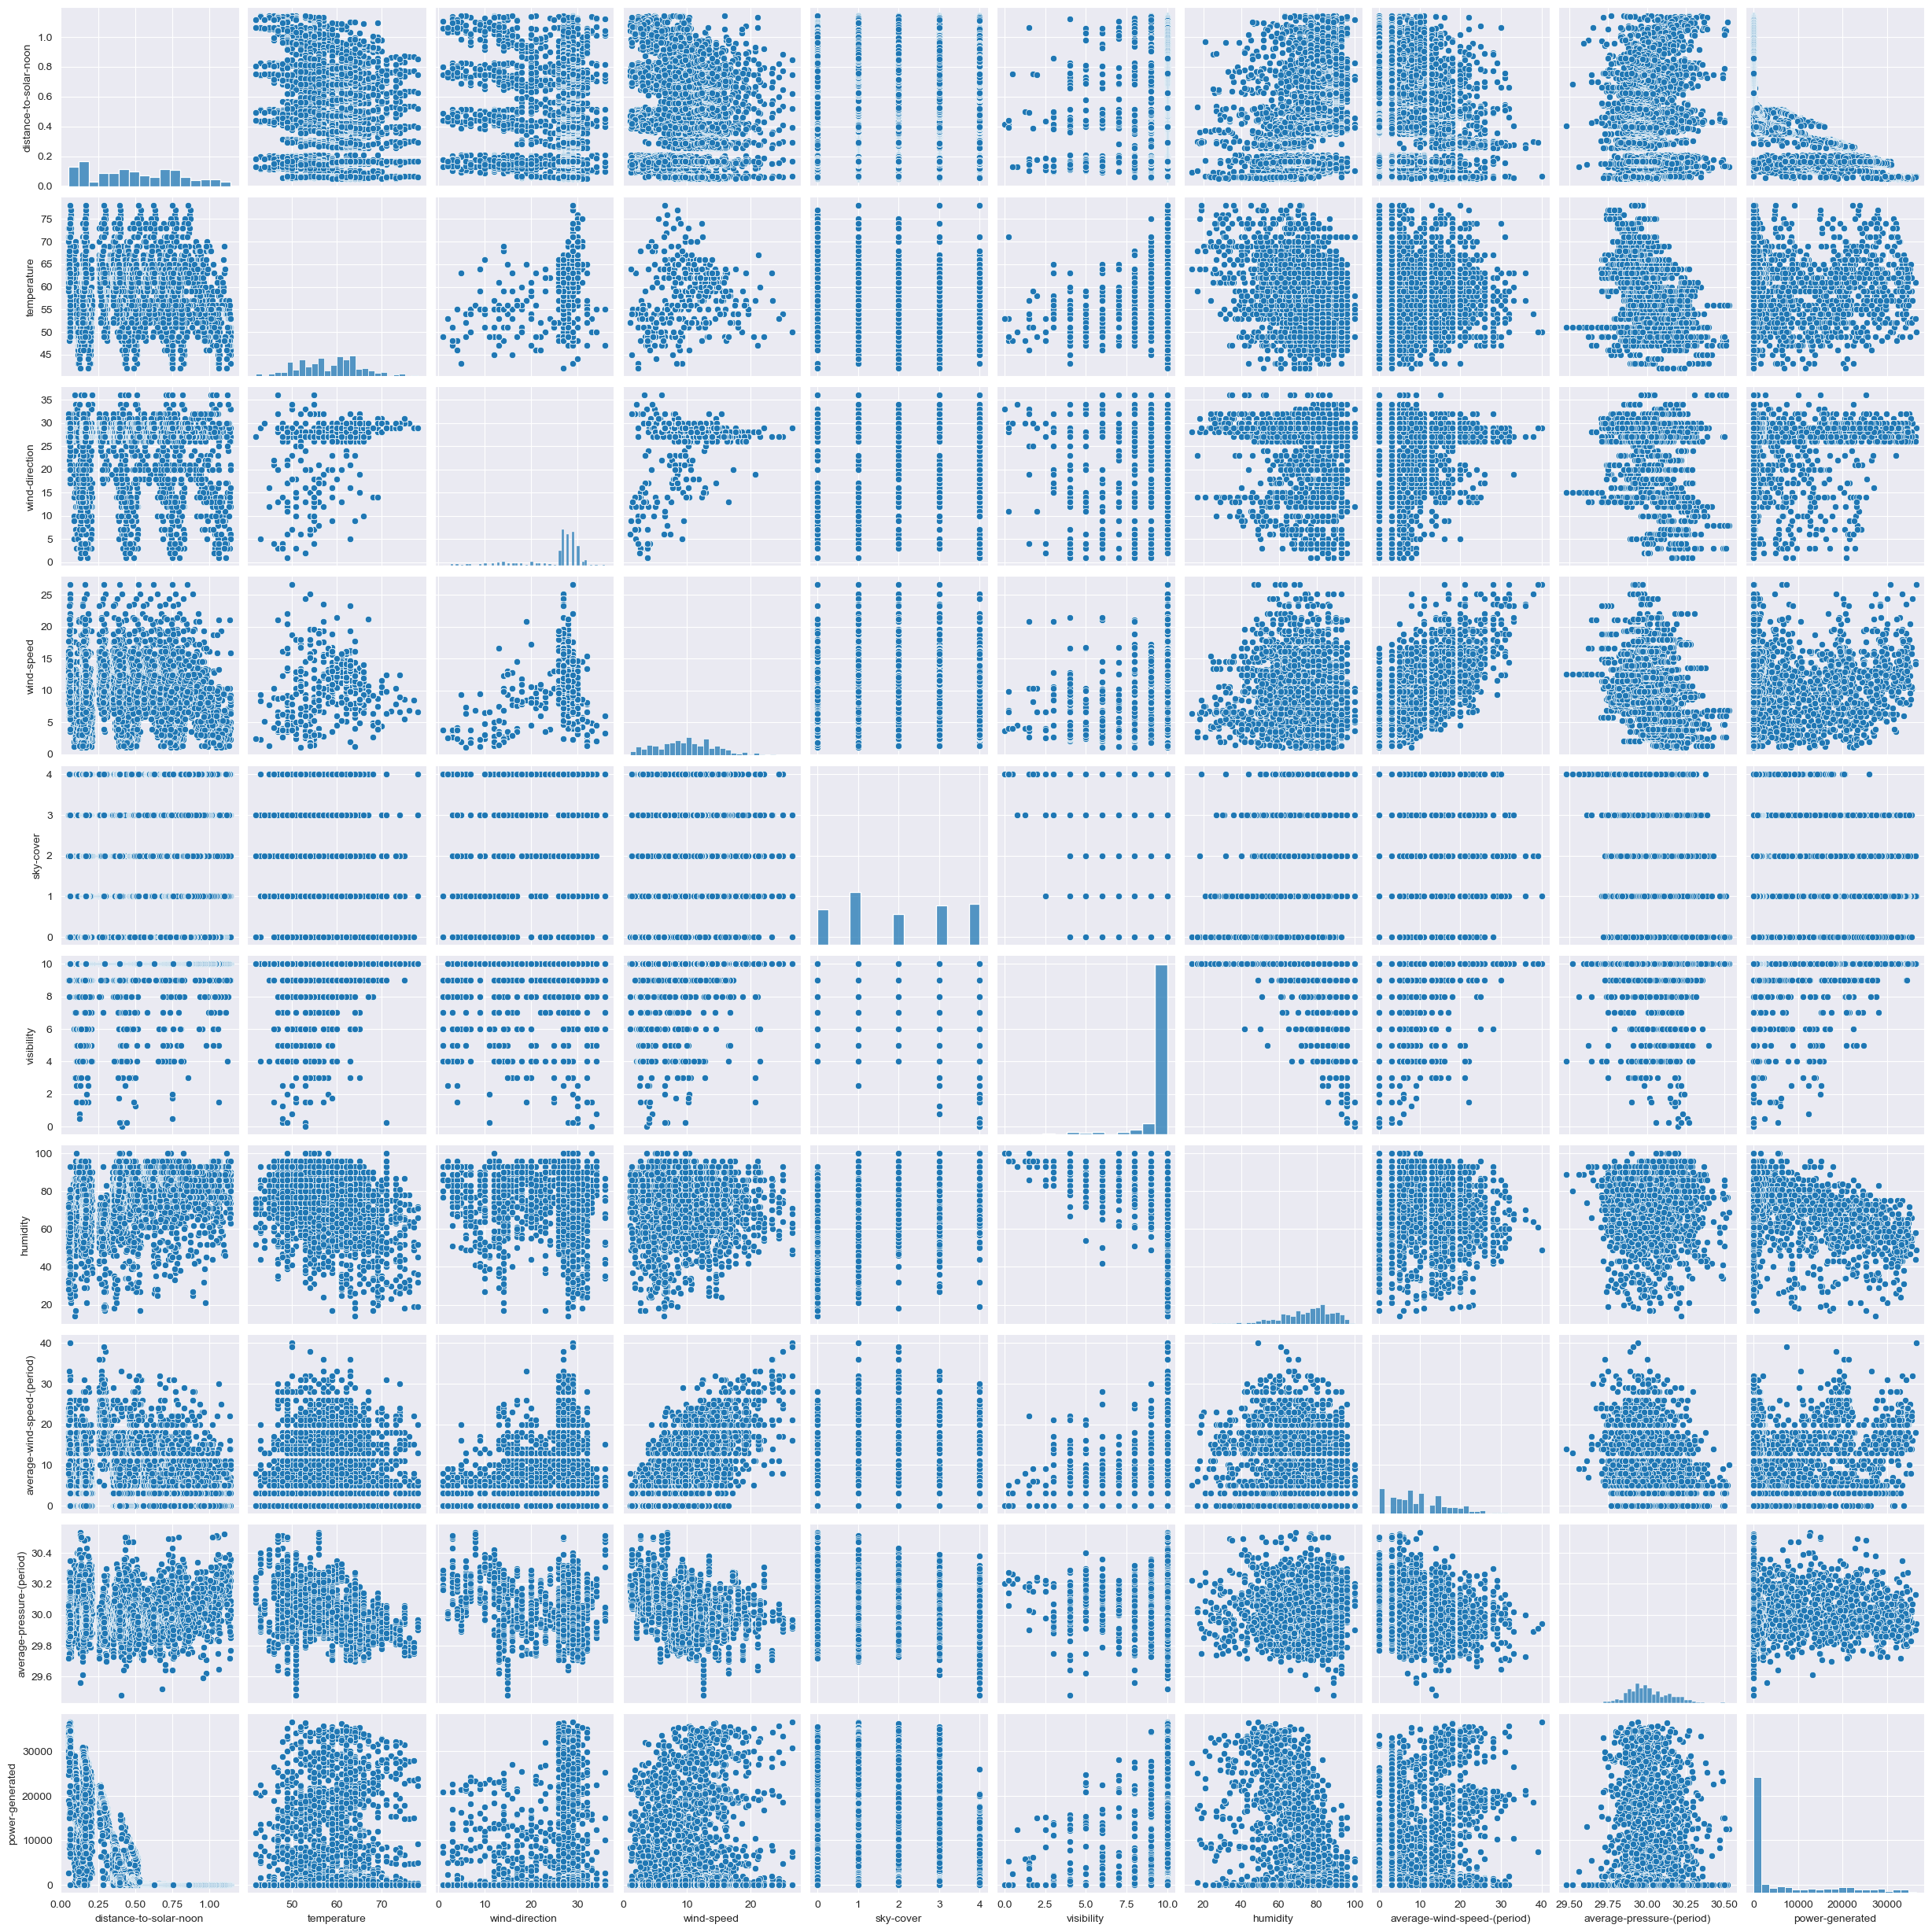

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(df)


C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


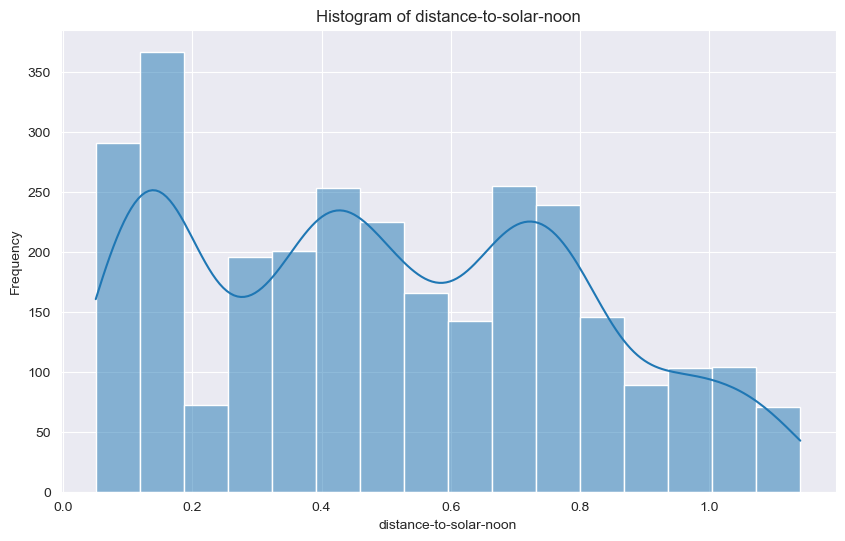

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


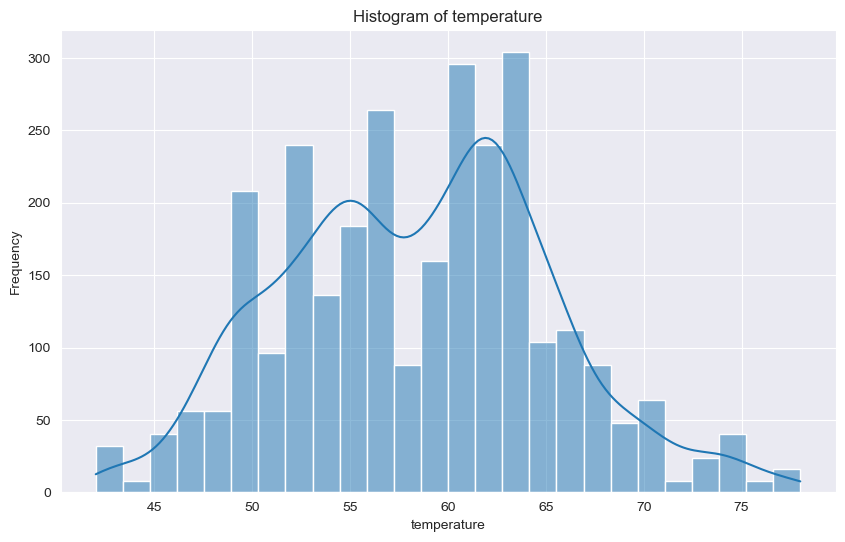

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


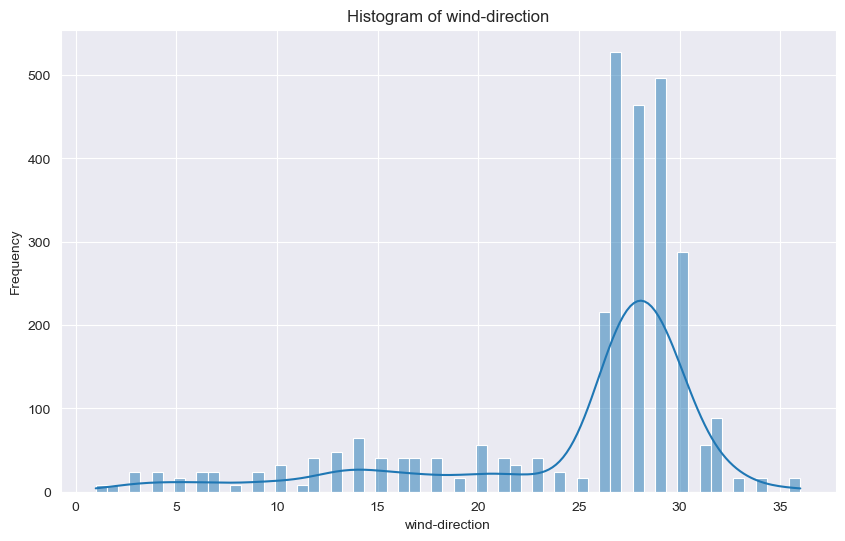

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


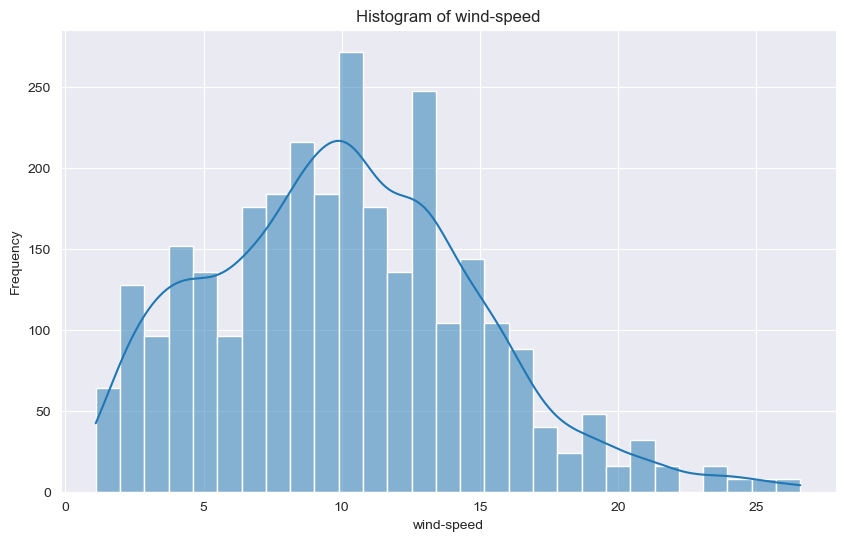

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


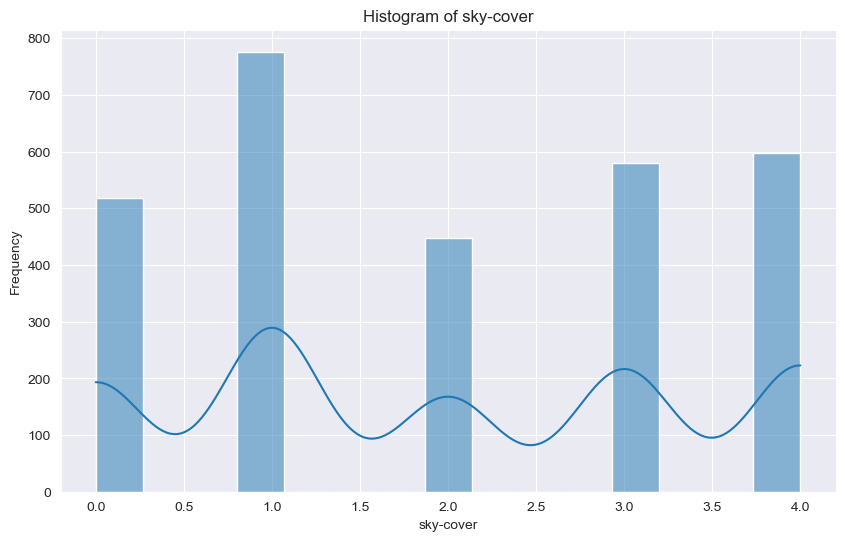

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


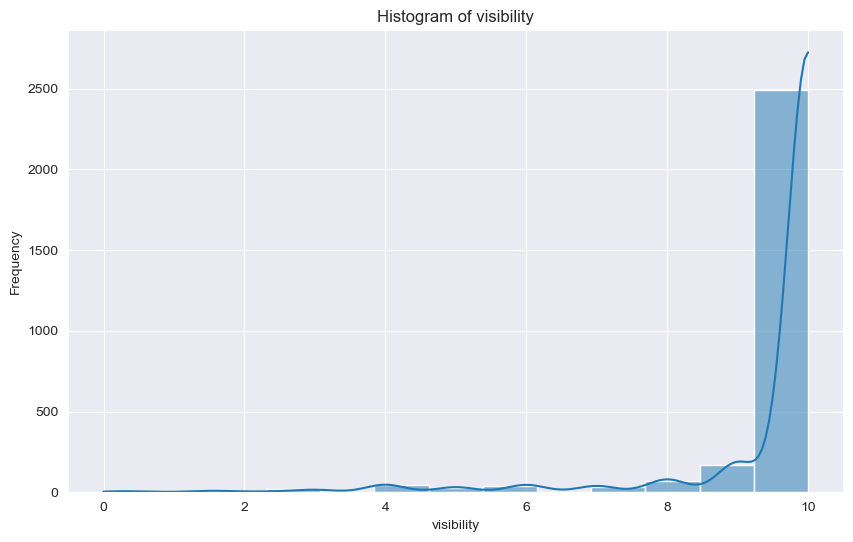

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


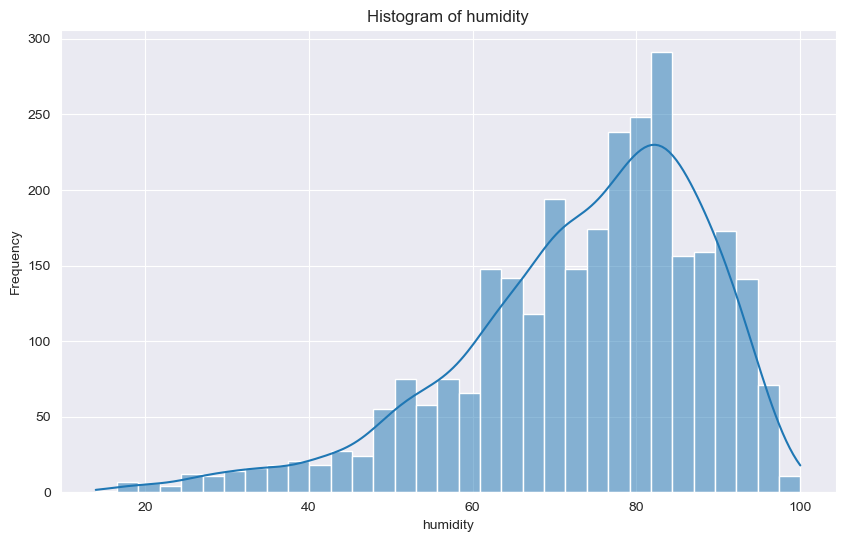

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


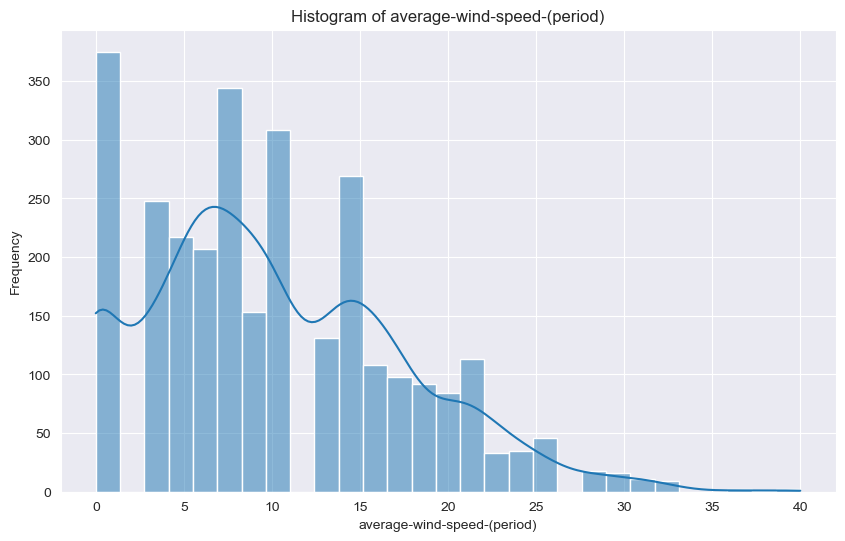

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


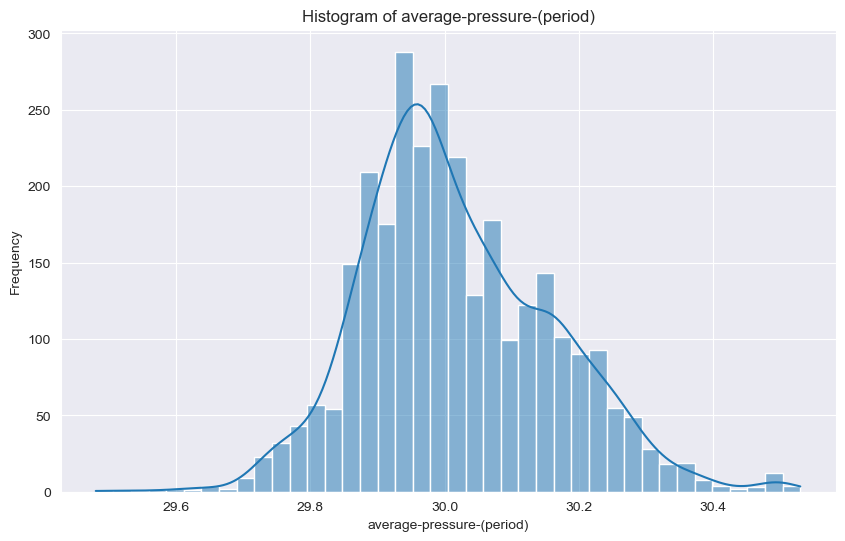

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


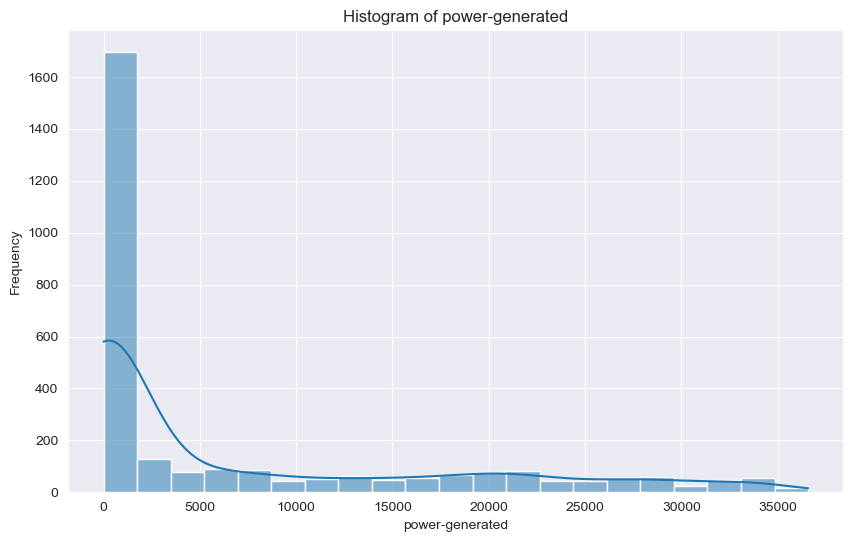

In [9]:
# Histograms for all columns
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


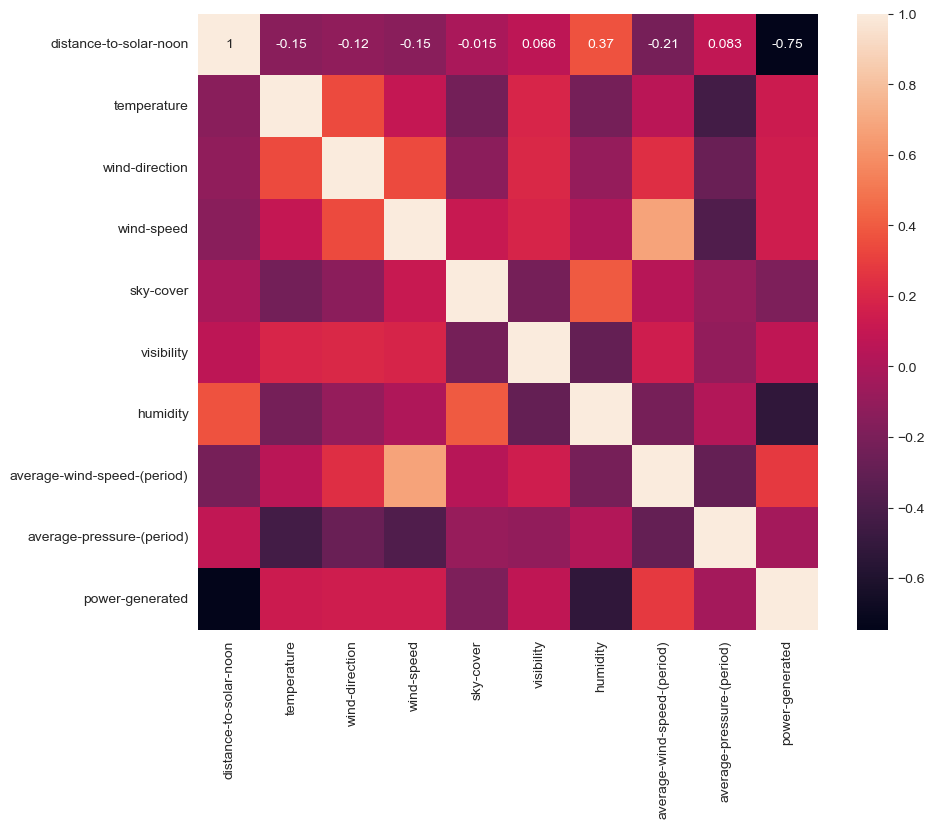

In [10]:
#Correlation_matrix

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()



In [11]:
# checking multicollinearity
df.corr(numeric_only=True)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214887,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054545,-0.435723,0.132193
wind-direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229706,-0.272405,0.146788
wind-speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673364,-0.379752,0.142641
sky-cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044301,-0.091512,-0.187236
visibility,0.065807,0.194110,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.143224,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.217959,0.018489,-0.522545
average-wind-speed-(period),-0.214887,0.054545,0.229706,0.673364,0.044301,0.143224,-0.217959,1.000000,-0.293406,0.278154
average-pressure-(period),0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293406,1.000000,-0.036771
power-generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,0.076536,-0.522545,0.278154,-0.036771,1.000000


Hence from above correlation, there is no high correlation among the independent variables (No Multicollinearity)

In [12]:
df.columns = ['solar_noon', 'temp', 'wind_dir', 'wind_spd', 'sky_cov', 'vis', 'hum', 'avg_wind_spd', 'avg_pres', 'power']
df

,solar_noon,temp,wind_dir,wind_spd,sky_cov,vis,hum,avg_wind_spd,avg_pres,power
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [13]:
import statsmodels.formula.api as smf 
model=smf.ols('power~solar_noon+temp+wind_dir+wind_spd+sky_cov+vis+hum+avg_wind_spd+avg_pres',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  power   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     598.4
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:04:56   Log-Likelihood:                -29597.
No. Observations:                2920   AIC:                         5.921e+04
Df Residuals:                    2910   BIC:                         5.927e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.425e+04   3.01e+04     -1.138      0.255   -9.33e+04    2.48e+04
solar_noon   -2.268e+04    434.362    -52.224      0.000   -2.35e+04   -2.18e+04
temp           -65.9833     20.375     -3.238      0.001    -105.935     -26.032
wind_dir        45.3279     18.704      2.423      0.015       8.654      82.002
wind_spd       -12.9125     35.034     -0.369      0.712     -81.606      55.781
sky_cov       -835.7706     93.187     -8.969      0.000   -1018.489    -653.052
vis            178.4364     91.391      1.952      0.051      -0.762     357.635
hum           -146.3220      9.767    -14.981      0.000    -165.474    -127.170
avg_wind_spd   142.7423     22.390      6.375      0.000      98.841     186.644
avg_pres      2157.8783    978.817      2.205      0.028     238.634    4077.122
==============================================================================
Omnibus:                       10.428   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.404
Skew:                           0.142   Prob(JB):                      0.00551
Kurtosis:                       3.071   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Prob of F-statistic indicates high significance of coefficients as it is completely zero

0.64 means that 64% of the variance in the dependent variable can be explained by the independent variables in the model. 

So if the regression coefficients have to be significant the observed p values shall be less than 0.05

A lower AIC, BIC  values indicates a better model.

Since the probabilities of omnibus , JB is less than 0.05 ,Hence the residuals are not normally distributed

From durbin - Watson values, We can confirm that observations are a bit independent as it is around 2

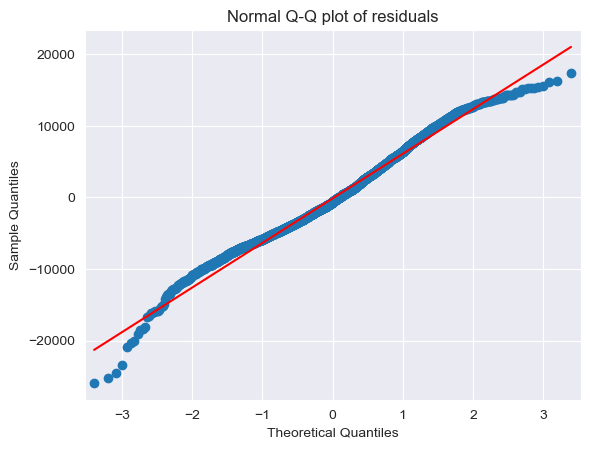

In [14]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Checking homoscedasticity

In [15]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


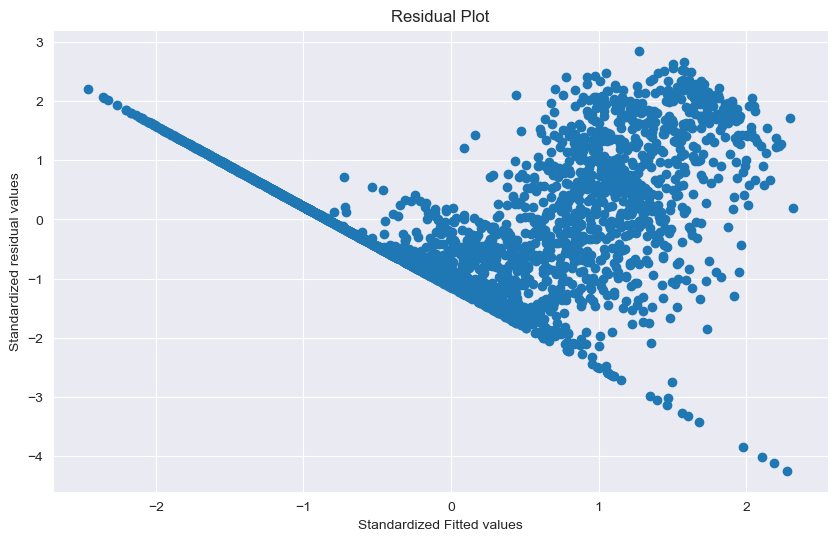

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

From above observation , The homoscedasticity is  achieved

In [17]:
#Coefficients
model.params

Intercept      -34254.166965
solar_noon     -22684.194276
temp              -65.983297
wind_dir           45.327936
wind_spd          -12.912487
sky_cov          -835.770572
vis               178.436434
hum              -146.322006
avg_wind_spd      142.742335
avg_pres         2157.878303
dtype: float64

As we can see, Larger magnitudes of coefficients indicate stronger relationships between the predictor variables and the response variable.

In [18]:
#t and p-Values
print(model.tvalues, '\n\n', model.pvalues)

Intercept       -1.137720
solar_noon     -52.224227
temp            -3.238409
wind_dir         2.423480
wind_spd        -0.368575
sky_cov         -8.968764
vis              1.952444
hum            -14.980524
avg_wind_spd     6.375286
avg_pres         2.204578
dtype: float64 

 Intercept       2.553313e-01
solar_noon      0.000000e+00
temp            1.215494e-03
wind_dir        1.543321e-02
wind_spd        7.124713e-01
sky_cov         5.246377e-19
vis             5.098121e-02
hum             6.265663e-49
avg_wind_spd    2.116410e-10
avg_pres        2.756167e-02
dtype: float64


 Statistical significance (often tested using p-values) should be checked. Coefficients with p-values less than a chosen significance level (e.g., 0.05) are generally considered significant. Hence all above features are equally significant

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


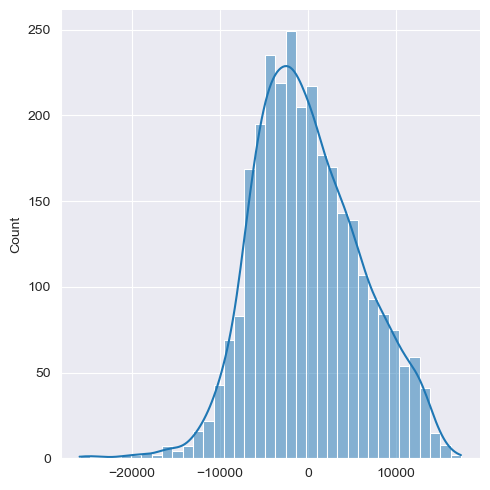

In [19]:
sns.displot(model.resid, kde = True)

As we can observe that, Our data is normally distributed

In [20]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([5.56406952e-06, 9.27196779e-05, 1.16318075e-04, ...,
       5.11535053e-05, 8.62089273e-05, 1.79134849e-06])

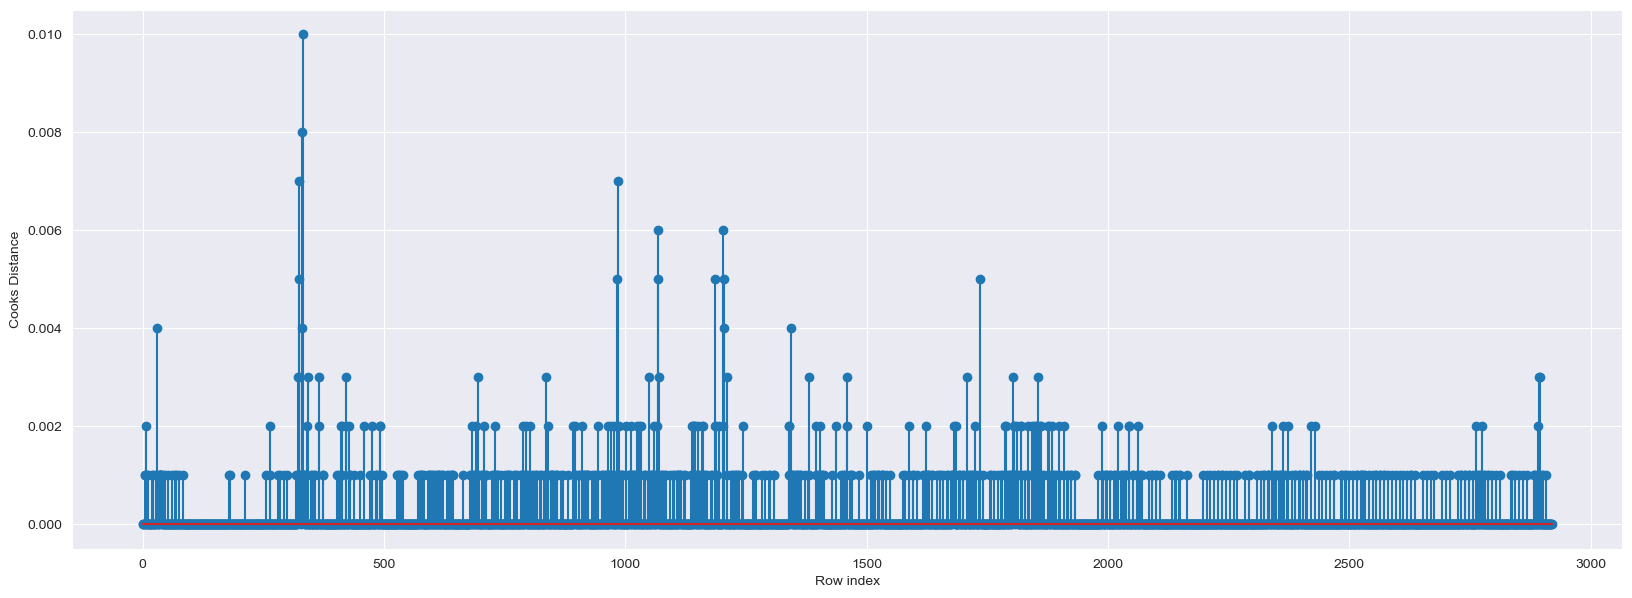

In [21]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

Above plot indicates that the features are moderately influencing the on predicted values

In [22]:
k = 3
n = 81
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.14814814814814814

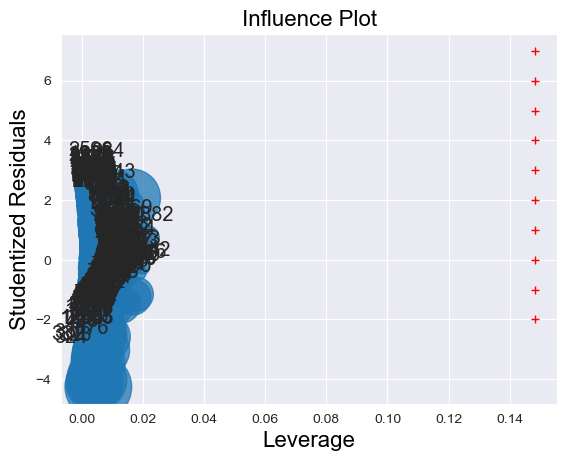

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

<HTML>

<em color='green'><strong> From the above plot, it is evident that none data points are influencers as their H Leverage values are lesser </em>


In [24]:
(model.rsquared_adj,model.aic)

(0.6481334157687565, 59214.636153861604)

In [25]:
X = df.drop('power', axis = 1)
y = df['power']
df

,solar_noon,temp,wind_dir,wind_spd,sky_cov,vis,hum,avg_wind_spd,avg_pres,power
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [26]:
# Splitting the dataset into the Training set and Test set
model=smf.ols('power~solar_noon+temp+wind_dir+wind_spd+sky_cov+vis+hum+avg_wind_spd+avg_pres',data=df).fit()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (2336, 9)
Shape of X_test:  (584, 9)
Shape of y_train:  (2336,)
Shape of y_test (584,)


In [27]:


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [28]:
models = []

names = [
    "LinearRegression",
    "DecisionTreeRegressor",
    "BaggingRegressor",
    "RandomForestRegressor",
    "GradientBoostingRegressor",
    "AdaBoostRegressor",
    "KNeighborsRegressor",
    "xgb.XGBRegressor"
]

scores = []

clf = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
]

In [29]:
for model in clf:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
 
final_scores = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy'])

final_scores.sort_values(by='Accuracy',ascending=False).style.background_gradient(cmap="tab10").set_properties(**{
            'font-family': 'Comic Sans MS',
            'color': 'Brown',
            'font-size': '15px'
        })

,Classifier,Accuracy
4,GradientBoostingRegressor,0.901050
3,RandomForestRegressor,0.892071
2,BaggingRegressor,0.884562
1,DecisionTreeRegressor,0.816372
5,AdaBoostRegressor,0.758598
0,LinearRegression,0.625059
6,KNeighborsRegressor,0.470878


As we can see, Gradient Boosting Algorithm has provided us high accuracy score among all regressors

In [30]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:  3981.0130136986295
MSE:  36902703.13886986
RMSE:  6074.759512842452
R2 Square:  0.6536510556872114
=========Testing Result=======
MAE:  4849.927397260274
MSE:  55736138.96191781
RMSE:  7465.664000068434
R2 Square:  0.4708784169905025


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.03,max_depth=5,random_state=42)
gbr.fit(X_train,y_train)
prediction = gbr.predict(X_test)
print(prediction)

[20457.96634464  2409.99629328   349.52088191  3925.2070886
  1438.17829346 26463.0820254    343.82159978   344.55710194
   369.16539157   357.68254367  2172.00165986   347.39476317
 19549.69141306 17154.23864338  5755.71954526   343.60054122
   349.3245251   1452.36224777  3144.1732565   2332.83555772
 18209.43881467   343.60054122 10744.87892845  2249.66393391
 16757.67819787   365.37116962  1998.12330149   761.11740472
 16308.33563428 17211.16835794 18825.68962039 32209.09589287
 20105.49013109   912.5328581    347.39476317 13152.40427776
   343.60054122  5247.88533826 26545.16356889   345.53030314
  2978.52036927   348.37035532 13649.13718675   347.39476317
  2117.40236183 20531.48828636  5870.51418601 18920.5452655
 20211.16310585   343.60054122   349.89274341 19181.11803945
 19099.80701901   343.60054122  2021.84236022   349.42764446
  4465.39509664  5278.39880096   343.60054122  2604.73094397
 28903.36828033  8128.21809036   349.42764446 14169.86932886
 21281.64602736  3795.3540

In [33]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
2437,21804,20457.966345
2470,2065,2409.996293
2359,0,349.520882
789,5654,3925.207089
1642,3621,1438.178293


In [34]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
2437,21804,20457.966345,1346.033655
2470,2065,2409.996293,-344.996293
2359,0,349.520882,-349.520882
789,5654,3925.207089,1728.792911
1642,3621,1438.178293,2182.821707


In [35]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='Dark2').set_properties(**{
            'font-family': 'Times New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
358,0,353.669929,-353.669929
2111,0,345.343988,-345.343988
1321,0,353.468471,-353.468471
794,108,5870.514186,-5762.514186
528,0,351.867988,-351.867988
2022,1288,2348.219418,-1060.219418
2342,2016,2409.996293,-393.996293
233,0,346.359043,-346.359043
518,0,351.092642,-351.092642
2880,0,343.600541,-343.600541
